In [1]:
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load Data
df_train = pd.read_csv('/home/sh0brun/Documents/Untitled Folder/train.csv')
print(df_train)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    1192

In [3]:
#Take sample feature
sample_df_train = df_train[['LotArea','GarageArea','SalePrice']]
print(sample_df_train.head())

   LotArea  GarageArea  SalePrice
0     8450         548     208500
1     9600         460     181500
2    11250         608     223500
3     9550         642     140000
4    14260         836     250000


In [4]:
#Clean Data
sample_df_train = sample_df_train.dropna()

# Create Train and Test Set from train.csv

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(sample_df_train,test_size = 0.3)
# print(train)
# print(test)
x_train = train.drop('SalePrice',axis = 1)
y_train = train['SalePrice']

x_test = test.drop('SalePrice', axis = 1)
y_test = test['SalePrice']


# Normalization
### Formula Transformation
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
<br> X_scaled = X_std * (max - min) + min
<br> nb: max and min given by feature_range

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1),copy=True)
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

# Predict

In [7]:
#Import support library
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt


In [8]:
K = 3
# Make the model
model = neighbors.KNeighborsRegressor(n_neighbors=K)

# Fitting 
model.fit(x_train,y_train)

# Prediction
prediction = model.predict(x_test)
prediction

array([219000.        , 288233.33333333, 185153.33333333, 219083.33333333,
       172510.        , 309593.33333333, 241116.33333333, 115000.        ,
       228666.66666667, 324722.66666667, 247933.33333333, 156000.        ,
       164666.66666667, 188000.        , 109333.33333333, 159000.        ,
       203800.        , 298926.66666667, 272109.33333333, 222644.33333333,
       224333.33333333, 159500.        , 117333.33333333, 198500.        ,
       195666.66666667, 228666.66666667, 226166.66666667, 133500.        ,
       211000.        , 130966.66666667, 258000.        , 171666.66666667,
       116000.        , 148300.        , 219333.33333333, 138333.33333333,
       307000.        , 137333.33333333, 120633.33333333, 149633.33333333,
       175166.66666667, 307333.33333333, 149900.        ,  81687.        ,
       164666.66666667, 223666.66666667, 160666.66666667, 143316.66666667,
       241100.        , 120000.        , 224333.33333333, 155000.        ,
       219000.        , 2

# Check Error

In [9]:
error = sqrt(mean_squared_error(y_test,prediction))
error

73564.3434250321

## Check Error with some 

In [10]:
all_error = [] 
str_error = []
for K in range(100):
    K += 1
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    
    #fitting
    model.fit(x_train,y_train)
    
    #prediction
    prediction = model.predict(x_test)
    
    #count error and store it
    error = sqrt(mean_squared_error(y_test,prediction))
    
    all_error.append(error)
    str_ ="RMSE for K = " + str(K) + " is " + str(error) 
    str_error.append(str_)
str_error

['RMSE for K = 1 is 94565.80163636246',
 'RMSE for K = 2 is 79942.6230518513',
 'RMSE for K = 3 is 73564.3434250321',
 'RMSE for K = 4 is 70692.10297700213',
 'RMSE for K = 5 is 69695.08478312536',
 'RMSE for K = 6 is 69044.04922271954',
 'RMSE for K = 7 is 68145.2880374472',
 'RMSE for K = 8 is 67355.72081537086',
 'RMSE for K = 9 is 67531.70642185923',
 'RMSE for K = 10 is 66840.07745995108',
 'RMSE for K = 11 is 67216.35082062663',
 'RMSE for K = 12 is 66693.95402657155',
 'RMSE for K = 13 is 66483.15622121375',
 'RMSE for K = 14 is 66588.89560465742',
 'RMSE for K = 15 is 66474.73842291818',
 'RMSE for K = 16 is 65981.286380435',
 'RMSE for K = 17 is 65888.82880788161',
 'RMSE for K = 18 is 66113.89187847912',
 'RMSE for K = 19 is 65953.70172448375',
 'RMSE for K = 20 is 65692.9273703773',
 'RMSE for K = 21 is 65633.54068082334',
 'RMSE for K = 22 is 65591.65361661038',
 'RMSE for K = 23 is 65761.37685198545',
 'RMSE for K = 24 is 65630.57739284953',
 'RMSE for K = 25 is 65711.7167

## Plotting

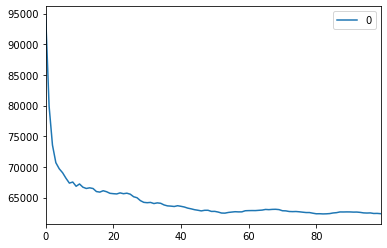

In [11]:
plot_curve = pd.DataFrame(all_error)
plot_curve.plot()


In [12]:
mini = all_error[0]
index = 0
for i in range(len(all_error)):
     if all_error[i]<mini :
            mini = all_error[i]
            index = i

print("The smallest value RMSE is ",mini," in index ",index)

The smallest value RMSE is  62333.87976718298  in index  82
